# Kaggle ML & DS Survey Challenge

Import required library

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import f_oneway

import matplotlib.pyplot as plt
%matplotlib inline
# pip install missingno
import missingno as msno
import seaborn as sns
 
from sklearn.model_selection import train_test_split, KFold, learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
   
import warnings
warnings.filterwarnings("ignore")

# Part 1

Explore the survey data to understand 
1. the nature of women’s representation in Data Science and Machine Learning and 
2. the effects of education on income level.

In [2]:
# import dirty and clean data set
dirty = pd.read_csv("kaggle_survey_2020_responses.csv")
clean = pd.read_csv("clean_kaggle_data.csv")

In [3]:
# features with less nan contains more information 
# view first 20 features (skip the index column) 
features = clean.notna().sum().sort_values(ascending=False)[1:21].index.tolist()
# print (features)

# view questions in dirty data set accroding to features have less missing value in clean data set
pd.set_option('display.max_colwidth', -1)
dirty[features].iloc[0]

Q4                                     What is the highest level of formal education that you have attained or plan to attain within the next 2 years?                                                            
Q20                                    What is the size of the company where you are employed?                                                                                                                    
Q22                                    Does your current employer incorporate machine learning methods into their business?                                                                                       
Q24                                    What is your current yearly compensation (approximate $USD)?                                                                                                               
Q6                                     For how many years have you been writing code and/or programming?                                                    

In [4]:
# take a look of the following features
EDA = clean[['Q4','Q20','Q24','Q6','Q5','Q3','Q1','Q2','Q15']]
EDA.columns = ['Education','Company_Size','Salary','Coding_Experience','Role', 
             'Country','Age','Gender','ML_Experience']
EDA.head()

,Education,Company_Size,Salary,Coding_Experience,Role,Country,Age,Gender,ML_Experience
0,Master’s degree,"10,000 or more employees",125000,5-10 years,Data Engineer,United States of America,30-34,Man,1-2 years
1,Bachelor’s degree,"1000-9,999 employees",20000,10-20 years,Software Engineer,Argentina,35-39,Man,I do not use machine learning methods
2,Master’s degree,250-999 employees,150000,5-10 years,Data Scientist,United States of America,30-34,Man,3-4 years
3,Doctoral degree,"1000-9,999 employees",80000,5-10 years,Data Scientist,Germany,35-39,Man,2-3 years
4,Doctoral degree,0-49 employees,40000,1-2 years,Research Scientist,United States of America,35-39,Man,Under 1 year


## 1.1 Perform exploratory data analysis to analyze the survey dataset and to summarize its main characteristics. 

### 1.1.1 The nature of women’s representation in Data Science and Machine Learning 

In [5]:
# Focus on Man&Woman while studing women's representation  
print(EDA.groupby(['Gender']).count().iloc[:,1])
df1 = EDA[EDA['Gender'].isin (['Man','Woman'])]
df1.head()

Gender
Man                        8872
Nonbinary                  20  
Prefer not to say          131 
Prefer to self-describe    23  
Woman                      1683
Name: Company_Size, dtype: int64


,Education,Company_Size,Salary,Coding_Experience,Role,Country,Age,Gender,ML_Experience
0,Master’s degree,"10,000 or more employees",125000,5-10 years,Data Engineer,United States of America,30-34,Man,1-2 years
1,Bachelor’s degree,"1000-9,999 employees",20000,10-20 years,Software Engineer,Argentina,35-39,Man,I do not use machine learning methods
2,Master’s degree,250-999 employees,150000,5-10 years,Data Scientist,United States of America,30-34,Man,3-4 years
3,Doctoral degree,"1000-9,999 employees",80000,5-10 years,Data Scientist,Germany,35-39,Man,2-3 years
4,Doctoral degree,0-49 employees,40000,1-2 years,Research Scientist,United States of America,35-39,Man,Under 1 year


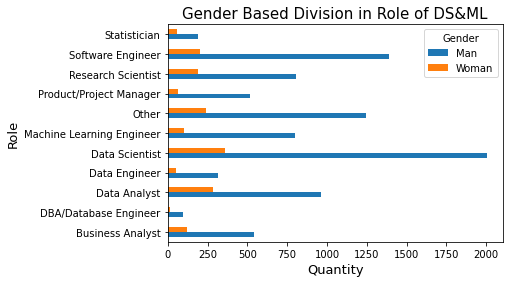

In [6]:
df1.groupby(['Gender']).Role.value_counts().unstack(0).plot.barh()
plt.title('Gender Based Division in Role of DS&ML', fontsize=15)
plt.xlabel('Quantity', fontsize=13)
plt.ylabel('Role', fontsize=13)
plt.show()

# The amount of women in all DS&ML roles are less than man

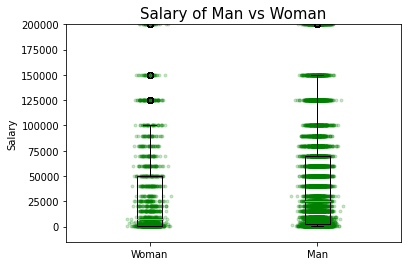

In [7]:
gend = list(['Woman', 'Man'])
Man_salary = df1[df1['Gender'] == 'Man']['Salary']
Woman_salary = df1[df1['Gender'] == 'Woman']['Salary']

for i in [1,2]:
    y = df1.Salary[df1.Gender==gend[i-1]].dropna()        
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'g.', alpha=0.2)
    
plt.boxplot([Woman_salary,Man_salary],labels=gend)

plt.title('Salary of Man vs Woman', fontsize=15)
plt.ylabel('Salary')
plt.ylim((-15000,200000))   
plt.show()

# The salary of woman is lower than man in general

### 1.1.2 The effects of education on income level.

In [8]:
# Focus on Man&Woman while studing women's representation  
print(EDA.groupby(['Education']).count().iloc[:,1])
df2 = EDA[EDA['Education'].isin (['Bachelor’s degree','Master’s degree','Doctoral degree'])]
df2.head()

Education
Bachelor’s degree                                                    3013
Doctoral degree                                                      1718
I prefer not to answer                                               158 
Master’s degree                                                      4879
No formal education past high school                                 106 
Professional degree                                                  470 
Some college/university study without earning a bachelor’s degree    385 
Name: Salary, dtype: int64


,Education,Company_Size,Salary,Coding_Experience,Role,Country,Age,Gender,ML_Experience
0,Master’s degree,"10,000 or more employees",125000,5-10 years,Data Engineer,United States of America,30-34,Man,1-2 years
1,Bachelor’s degree,"1000-9,999 employees",20000,10-20 years,Software Engineer,Argentina,35-39,Man,I do not use machine learning methods
2,Master’s degree,250-999 employees,150000,5-10 years,Data Scientist,United States of America,30-34,Man,3-4 years
3,Doctoral degree,"1000-9,999 employees",80000,5-10 years,Data Scientist,Germany,35-39,Man,2-3 years
4,Doctoral degree,0-49 employees,40000,1-2 years,Research Scientist,United States of America,35-39,Man,Under 1 year


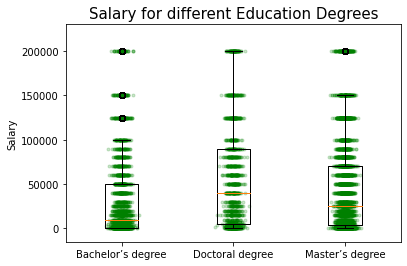

In [9]:
educ = ['Bachelor’s degree', 'Doctoral degree', 'Master’s degree']
Bachelor_salary = df1[df1['Education'] == 'Bachelor’s degree']['Salary']
Doctoral_salary = df1[df1['Education'] == 'Doctoral degree']['Salary']
Master_salary = df1[df1['Education'] == 'Master’s degree']['Salary']

for i in [1,2,3]:
    y = df1.Salary[df1.Education==educ[i-1]].dropna()        
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'g.', alpha=0.2)
    
plt.boxplot([Bachelor_salary, Doctoral_salary, Master_salary],labels=educ)

plt.title('Salary for different Education Degrees', fontsize=15)
plt.ylabel('Salary')
plt.ylim((-15000,230000))   
plt.show()

# In general, the higher the degree, the higher the salary

## 1.2 Estimating the difference between average salary (Q24) of men vs. women (Q2).

### 1.2.1 Compute and report descriptive statistics for each group (remove missing data, if necessary).

In [10]:
# checking missing value
print ('missing salary data:', df1.Gender.isna().sum())

# estimate mean, one of the descriptive statistics
desc1 = df1.groupby(['Gender']).mean()
desc1.columns = ['Average Salary']
desc1

missing salary data: 0


,Average Salary
Gender,
Man,50750.619928
Woman,36417.112299


### 1.2.2 If suitable, perform a two-sample t-test with a 0.05 threshold. 
Independent two-sample t-test Assumptions: 1.Independence 2.Normality 3.Equal variances

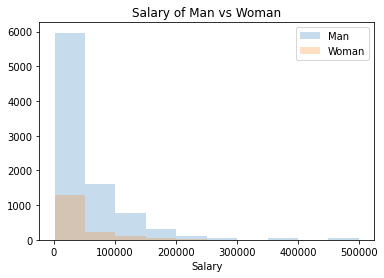

In [11]:
# distribution before bootstrap
plt.figure()
plt.hist(Man_salary, bins=10, alpha=0.25)
plt.hist(Woman_salary, bins=10, alpha=0.25)

plt.title("Salary of Man vs Woman")
plt.xlabel("Salary")
plt.legend(["Man", "Woman"], loc='best')
plt.show()

# Not suitable, since the assumption of normality is not met. The sample is skewed and average salary 
# is largely biased by large values.

### 1.2.3 Bootstrap your data for comparing the mean of salary (Q24) for the two groups. Note that the number of instances you sample from each group should be relative to its size. Use 1000 replications. Plot two bootstrapped distributions (for men and women) and the distribution of the difference in means.

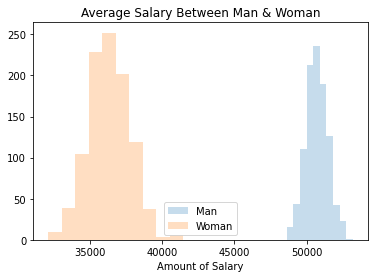

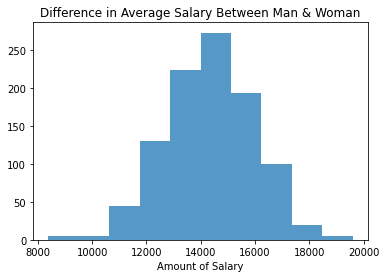

In [12]:
Man_avesalary = []
Woman_avesalary = []
avesalary_diff = []

for i in range(1000):  
    # first, split data by gender, bootstrap data with same size as original data 
    bootstrap_Man = df1[df1['Gender'] == 'Man'].sample(frac=1, replace=True) 
    bootstrap_Woman = df1[df1['Gender'] == 'Woman'].sample(frac=1, replace=True)  
     
    # calculate mean of bootsrape sample 
    Man_avesalary.append (bootstrap_Man.Salary.mean())
    Woman_avesalary.append (bootstrap_Woman.Salary.mean())
    avesalary_diff.append (bootstrap_Man.Salary.mean()-bootstrap_Woman.Salary.mean())

plt.figure()
plt.hist(Man_avesalary, bins=10, alpha=0.25);
plt.hist(Woman_avesalary, bins=10, alpha=0.25);
plt.title("Average Salary Between Man & Woman")
plt.xlabel("Amount of Salary")
plt.legend(["Man", "Woman"], loc='best')
plt.show() 

plt.hist(avesalary_diff, bins=10, alpha=0.75);
plt.title("Difference in Average Salary Between Man & Woman")
plt.xlabel("Amount of Salary")
plt.show()

### 1.2.4 If suitable, perform a two-sample t-test with a 0.05 threshold on the bootstrapped data. 
<br>Testing Equal variances:
<br>$H_0: \sigma_{man}^2 = \sigma_{women}^2$
<br> $H_1: \sigma_{man}^2 \neq \sigma_{women}^2$

In [13]:
tc, pc = stats.levene(Man_avesalary,  Woman_avesalary)

print ("t-test: t = %g  p = %g" % (tc, pc))
threshold = 0.05
if pc >= threshold:
    print ('statistically insignificant => equal variances')
else:
    print ('statistically significant => unequal variances')

t-test: t = 306.669  p = 5.45944e-64
statistically significant => unequal variances


##### The assumption of Equal variances is not met
Perform Welch’s t-test, not assume equal population variance 
<br> $H_0: \mu_{man} = \mu_{woman}$
<br> $H_a: \mu_{man}  \neq \mu_{woman}$

In [14]:
tc, pc = stats.ttest_ind(Man_avesalary,  Woman_avesalary, equal_var = False)
print ("t-test: t = %g  p = %g" % (tc, pc))
threshold = 0.05
if pc >= threshold:
    print ('statistically insignificant => equal means')
else:
    print ('statistically significant => unequal means')

t-test: t = 282.411  p = 0
statistically significant => unequal means


### 1.2.5 Findings
From the two-sample t-test, we could conclude that the average salary difference between two main genders is significant in the field of data science, men tend to have higher salary than women. The 
difference of average salary is around 14000. But without further analyse, we could not conclude the 
causation between gender and wage gap. One possibility is there's a mediation factor.

In [15]:
np.median(avesalary_diff)

14382.207795747749

## 1.3 Select “highest level of formal education” (Q4),  and use ANOVA for hypothesis testing to compare the means of salary for three groups (Bachelor’s degree, Doctoral degree, and Master’s degree)

### 1.3.1 Compute and report descriptive statistics for each group (remove missing data, if necessary).

In [16]:
# checking missing value
print ('missing salary data:', df2.Education.isna().sum())

# estimate mean, one of the descriptive statistics
desc2 = df2.groupby(['Education']).mean()
desc2.columns = ['Average Salary']
desc2

missing salary data: 0


,Average Salary
Education,
Bachelor’s degree,35732.824427
Doctoral degree,68719.441211
Master’s degree,52120.106579


### 1.3.2 If suitable, perform a analysis of variance (ANOVA) with a 0.05 threshold. 
ANOVA test Assumptions: 1.Independence 2.Normality 3.Equal variances

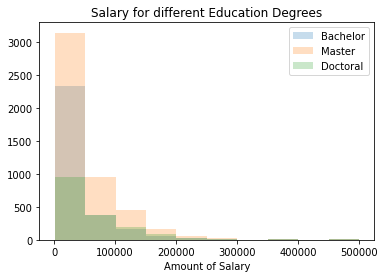

In [17]:
# distribution before bootstrap
plt.figure()
plt.hist(Bachelor_salary, bins=10, alpha=0.25)
plt.hist(Master_salary, bins=10, alpha=0.25)
plt.hist(Doctoral_salary, bins=10, alpha=0.25)

plt.title("Salary for different Education Degrees")
plt.xlabel("Amount of Salary")
plt.legend(["Bachelor","Master","Doctoral"], loc='best')
plt.show()

# Not suitable, since the assumption of normality is not met. The sample is skewed and average salary 
# is largely biased by large values.

### 1.3 3 Bootstrap your data for comparing the mean of salary (Q24) for the three groups. Note that the number of instances you sample from each group should be relative to its size. Use 1000 replications. Plot three bootstrapped distributions (for Bachelor’s degree, Doctoral degree, and Master’s degree) and the distribution of the difference in means.

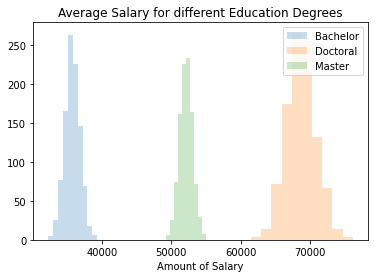

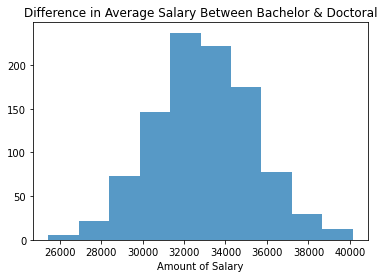

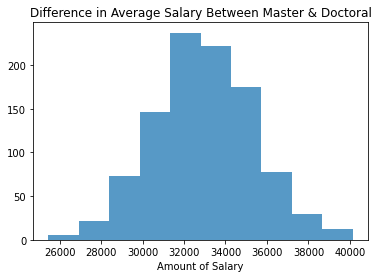

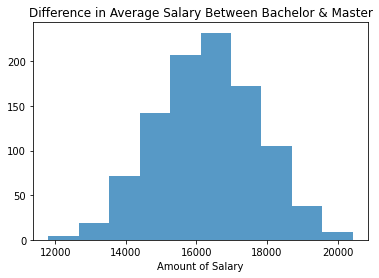

In [18]:
Bachelor_avesalary = []
Doctoral_avesalary = []
Master_avesalary = []

Bachelor_Doctoral_diff = []
Master_Doctoral_diff = []
Bachelor_Master_diff = []


for i in range(1000):  
    # first, split data by gender, bootsrape data with same size as original data 
    bootstrap_Bachelor = df2[df2['Education'] == 'Bachelor’s degree'].sample(frac=1, replace=True)
    bootstrap_Doctoral = df2[df2['Education'] == 'Doctoral degree'].sample(frac=1, replace=True) 
    bootstrap_Master = df2[df2['Education'] == 'Master’s degree'].sample(frac=1, replace=True) 
  
    # calculate mean of bootsrape sample 
    Bachelor_avesalary.append (bootstrap_Bachelor.Salary.mean())
    Doctoral_avesalary.append (bootstrap_Doctoral.Salary.mean())
    Master_avesalary.append (bootstrap_Master.Salary.mean())
    
    Bachelor_Doctoral_diff.append (bootstrap_Doctoral.Salary.mean()-bootstrap_Bachelor.Salary.mean())
    Master_Doctoral_diff.append (bootstrap_Doctoral.Salary.mean()-bootstrap_Bachelor.Salary.mean())
    Bachelor_Master_diff.append (bootstrap_Master.Salary.mean()-bootstrap_Bachelor.Salary.mean())
    

plt.figure()
plt.hist(Bachelor_avesalary, bins=10, alpha=0.25)
plt.hist(Doctoral_avesalary, bins=10, alpha=0.25)
plt.hist(Master_avesalary, bins=10, alpha=0.25)
plt.title("Average Salary for different Education Degrees")
plt.xlabel("Amount of Salary")
plt.legend(["Bachelor", "Doctoral",'Master'], loc='best')
plt.show() 

plt.hist(Bachelor_Doctoral_diff, bins=10, alpha=0.75);
plt.title("Difference in Average Salary Between Bachelor & Doctoral")
plt.xlabel("Amount of Salary")
plt.show()

plt.hist(Master_Doctoral_diff, bins=10, alpha=0.75);
plt.title("Difference in Average Salary Between Master & Doctoral")
plt.xlabel("Amount of Salary")
plt.show()

plt.hist(Bachelor_Master_diff, bins=10, alpha=0.75);
plt.title("Difference in Average Salary Between Bachelor & Master")
plt.xlabel("Amount of Salary")
plt.show()
 

### 1.3.4 If suitable, perform a analysis of variance (ANOVA)  with a 0.05 threshold on the bootstrapped data. 
<br>The plots show means distributions are normally distributed.
<br>Testing Equal variances:
<br>$H_0: \sigma_{Bachelor}^2 = \sigma_{Doctoral}^2 = \sigma_{Master}^2$
<br>$H_a: $ At least one group variance is differet from others

In [19]:
tc, pc = stats.levene(Bachelor_avesalary, Doctoral_avesalary, Master_avesalary)

print ("t-test: t = %g  p = %g" % (tc, pc))
threshold = 0.2
if pc >= threshold:
    print ('statistically insignificant => equal variances')
else:
    print ('statistically significant => At least one group variance is differet from others')

t-test: t = 313.841  p = 1.77466e-124
statistically significant => At least one group variance is differet from others


##### The assumption of Equal variances is not met
Perform Kruskal-Wallis ANOVA, not assume equal population variance 
<br>$H_0: \mu_{Bachelor} = \mu_{Doctoral} = \mu_{Master}$
<br>$H_a: $ At least one group mean is differet from others

In [20]:
F, p = stats.kruskal(Bachelor_avesalary, Doctoral_avesalary, Master_avesalary)
print('ANOVA Result: F =', F, ' p =', p) 

threshold = 0.05
if p >= threshold:
    print ('not statistically significant => equal means')
else:
    print ('statistically significant => At least one group mean is differet from others')


ANOVA Result: F = 2665.7781059646823  p = 0.0
statistically significant => At least one group mean is differet from others


### 1.3.5 Findings
From the Kruskal-Wallis ANOVA, we could conclude that the average salary difference among different Education 
Degrees is significant. Master tend to have higher salary about 16500 than Bachelor, and doctoral tend to have 
higher salary about 33000 than master.I would suggest to persue a higher degree to have higher salary. However,
without futher analyse, we could not conclude the causation between education level and wage gap. 

In [21]:
np.median(Bachelor_Doctoral_diff)
np.median(Bachelor_Master_diff)
np.median(Master_Doctoral_diff)

32899.22317609335

# Part 2

## 2.1 Data cleaning
While the data is made ready for analysis, several values are missing, and some features are
categorical. Note that some values that appear “null” indicate that a survey respondent did not select
that given option from a multiple-choice list. For example – “Which of the following hosted
notebook products do you use on a regular basis? (Select all that apply) - Selected Choice - Binder
/ JupyterHub”.

Load dataset "clean_kaggle_data_2020.csv" as Salaries


In [22]:
Salaries = pd.read_csv("clean_kaggle_data_2020.csv", low_memory = False)
# rename questions
Salaries.iloc[0,355] = "Salary Encoding"
Salaries.iloc[0,356] = "Target"

# Salaries not including the first line describe the questions
Salaries_questions = Salaries.iloc[0,:]
Salaries_questions = Salaries_questions.to_frame().T
Salaries = Salaries.iloc[1:,:]

print("Salaries dataset shape:",Salaries.shape)
Salaries.head()

Salaries dataset shape: (10729, 357)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER,Q24_Encoded,Q24_buckets
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,"100,000-124,999"
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,1,"10,000-19,999"
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,"125,000-149,9991"
4,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,"70,000-79,999"
5,742,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"30,000-39,999"


##### Count the number of missing values of features

In [23]:
# Function missing_values_table: create table store count and percentage of missing value of features
def missing_values_table(df):
    
    mis_val = df.isnull().sum() # count missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)  # Percentage of missing values        
    
    # create table  
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table = mis_val_table.rename(columns = {0 : '# Missing Values', 1 : '% Missing Values'})
    # only show features contain missing values
    mis_val_table = mis_val_table[mis_val_table['% Missing Values'] != 0].sort_values('% Missing Values', ascending=False) 
                 
    print ("There are",  mis_val_table.shape[0], "Features contain Nan.")  
    return mis_val_table 

missing_values_table(Salaries)

There are 344 Features contain Nan.


,# Missing Values,% Missing Values
Q34_A_Part_9,10685,99.589897
Q18_OTHER,10681,99.552614
Q28_B_OTHER,10675,99.496691
Q27_B_OTHER,10675,99.496691
Q31_A_Part_9,10673,99.478050
...,...,...
Q15,561,5.228819
Q13,561,5.228819
Q11,561,5.228819
Q8,561,5.228819


### 2.1.1 Multiple Choise Question
##### Nan is missing at random and it indicates a survey respondent did not select that given option from a multiple-choice list. First drop the column of choice 'None', since it won’t contribute to the salary. Then replace all non-Nan with 1 and fill Nan with 0.  
<br>
Q7 programming languages use on a regular basis <br>
Q9 integrated development environments use on a regular basis   <br>
Q10 hosted notebook products use on a regular basis   <br>
Q12 specialized hardware use on a regular basis  <br>
Q14 data visualization libraries/tools use on a regular basis  <br>
Q16 ML frameworks use on a regular basis   <br>
Q17 ML algorithms use on a regular basis   <br> 
Q23 activities make up an important part of your role at work     <br>  
Q26-A cloud computing platforms use on a regular basis  <br> 
Q29-A big data products use on a regular basis  <br>
Q31-A business intelligence tools use on a regular basis <br>
Q33-A autoML tools use on a regular basis <br>
Q35-A tools used to help manage ML experiments <br>
Q36 place publicly share or deploy data analysis or ML applications <br>
Q37 platforms begun or completed data science courses <br>
Q39 favorite media sources report on data science topics <br>

In [24]:
# Function search_test: find features contain certain word in a list

def search_test (list_substr):
    list_str=[ ]
    for i in list_substr:
        list_str.extend([col for col in Salaries.columns if i in col])
    return list_str

# example: fine features contain word 'Q7'
# search_test (['Q7'])

In [25]:
for question in ['Q7','Q9','Q10','Q12','Q14','Q16','Q17','Q23','Q26_A','Q29_A','Q31_A','Q33_A','Q35_A','Q36','Q37','Q39']:

    fetures = search_test ([question])

    # drop choice 'None': index -2
    Salaries = Salaries.drop(columns=fetures[-2])
    del fetures [-2]

    # replace non-Nan with 1, fill Nan with 0
    for i in fetures:
            colname = list(set(Salaries[i][Salaries[i].notna()]))[0]
            Salaries[i][Salaries[i].notnull()] = 1
            Salaries[i][Salaries[i].isnull()] = 0
            # rename column 
            colname = question + '_' + colname
            Salaries = Salaries.rename(columns = {i : colname})
            # change dtypes of column
            Salaries[colname] = Salaries[colname].astype(float)


### 2.1.2 Dropping Features  
##### (1) Drop Supplementary and Follow-up questions: those questions were received by different groups, remove them to avoid lots of noise
Supplementary and Follow-up questions are more specific compare to precious questions. Can’t treat them equally since they were received by different groups, remove them to avoid add noise to the model. 
 
#####  (2) Drop "Q24":  have been encoded to "Q24_Encoded" and "Q24_buckets"
iT has been encoded to new futures, drop it to avoid duplicate information. 

##### (3) Drop "Time from Start to Finish (seconds)":  won't contribute much useful information
it won't contribute much useful information to estimate salary class.

 

 

In [26]:
# 1. Drop Supplementary and Follow up Questions
Supplementary_Questions = ['Q26_B','Q27_B','Q28_B','Q29_B','Q31_B','Q33_B','Q34_B','Q35_B']
Followup_Questions = ["Q18", "Q19", "Q27_A", "Q28_A", "Q30", "Q32", "Q34_A"]
Supplementary_fetures = search_test (Supplementary_Questions)   
Followup_fetures = search_test (Followup_Questions)   
Salaries = Salaries.drop(columns=Supplementary_fetures+Followup_fetures)
 
# 2. Drop "Q24"
Salaries = Salaries.drop(columns = ["Q24","Time from Start to Finish (seconds)"]) 
missing_values_table(Salaries)

There are 6 Features contain Nan.


,# Missing Values,% Missing Values
Q38,1253,11.678628
Q8,561,5.228819
Q11,561,5.228819
Q13,561,5.228819
Q15,561,5.228819
Q25,159,1.481965


###  2.1.3 Drop 561 Rows
The plot of missingno indicates the missing values for Q8, Q11, Q13, Q15 are belong to same respondents. <br>

Q8: What programming language would you recommend an aspiring data scientist to learn first? <br>
Q11: What type of computing platform do you use most often for your data science projects?<br>
Q13: Approximately how many times have you used a TPU (tensor processing unit)?<br>
Q15: For how many years have you used machine learning methods?

There are 2 Features contain Nan.


,# Missing Values,% Missing Values
Q38,1028,10.110149
Q25,134,1.317860


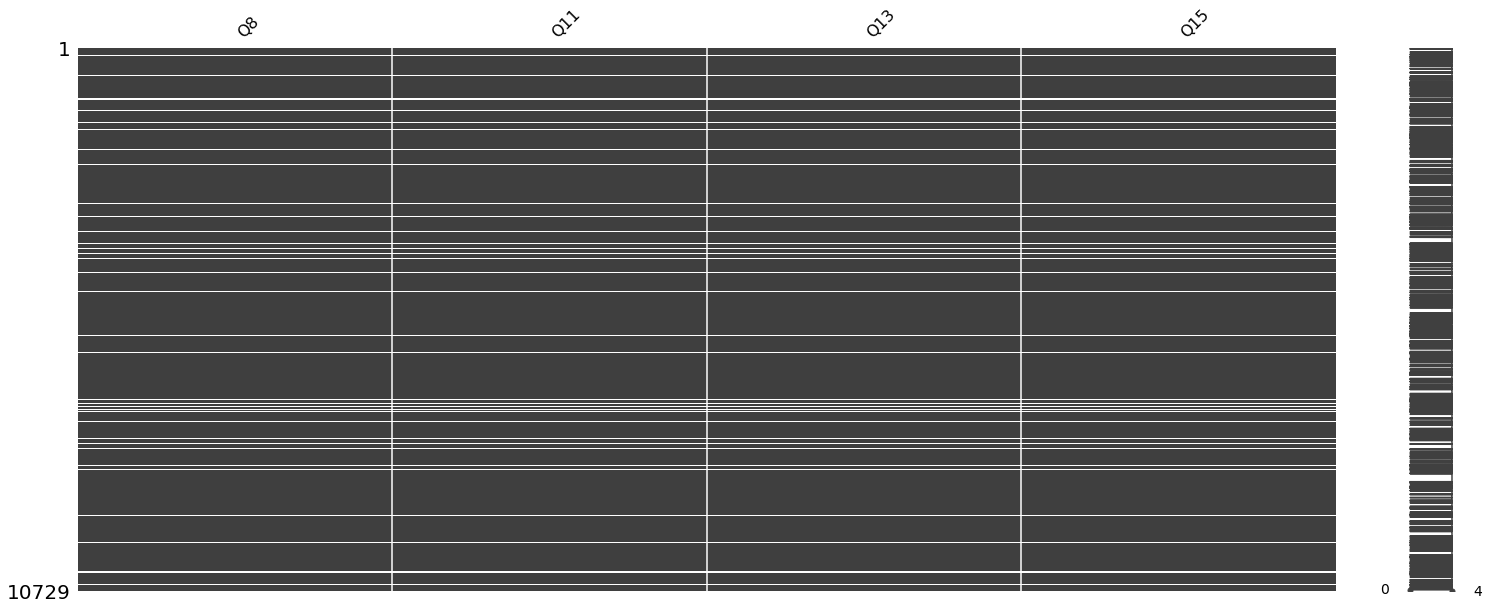

In [27]:
msno.matrix(Salaries.loc[:,['Q8','Q11','Q13','Q15']])
Salaries.dropna(subset=['Q8'],how='any',inplace=True)
missing_values_table(Salaries)

###  2.1.4 For fetures Q25 and Q38
Values missing at random, fill with mode. The dataset does not contain any missing value after this step. <br>

Q25: Approximately how much money have you spent on ML/cloud computing services at home (or at work) in the past 5 years (approximate USD )? <br>
Q38: What is the primary tool that you use at work or school to analyze data? (Include text response) <br>

In [28]:
Salaries["Q38"].fillna(Salaries["Q38"].mode()[0], inplace=True)
Salaries["Q25"].fillna(Salaries["Q25"].mode()[0], inplace=True)
missing_values_table(Salaries)

There are 0 Features contain Nan.


,# Missing Values,% Missing Values


### 2.1.5 Ordinal Categorical Features
Encode an interval to the median of the range, encode greater or smaller than a number to the number itself, and remain the same for one number. Noted encoding for Q4 (Education) is defined differently (encode higher degree to larger number), more details could be found on Jupyter Notebook. This encoding method would reserve the information of order. 

Q1 What is your age (# years)? <br>
Q4 What is the highest level of formal education that you have attained or plan to attain within the next 2 years? <br>
Q6 For how many years have you been writing code and/or programming? <br>
Q13 Approximately how many times have you used a TPU (tensor processing unit)? <br>
Q15 For how many years have you used machine learning methods?  <br>
Q20 What is the size of the company where you are employed? <br>
Q21 Approximately how many individuals are responsible for data science workloads at your place of business? <br>
Q25 Approximately how much money have you (or your team) spent on machine learning and/or cloud <br>
computing services at home (or at work) in the past 5 years (approximate USD )? 

In [29]:
# define encoding function based on encoding logic
def ordinal_encoding (str):

    str = str.replace(" years","")
    str = str.replace(",","")
    str = str.replace(" employees","")
    str = str.replace(" times","")
    str = str.replace("$","")
    str = str.replace(" (USD)","")
     
    if "-" in str:
        min = float(str.split('-')[0])
        max = float(str.split('-')[1])
        encode = min+(max-min)/2
    elif "+" in str: 
        encode = float(str.split('+')[0])  
    
    elif "more" in str: 
        encode = float(str.split(' ')[0]) 
    elif "More" in str: 
        encode = float(str.split(' ')[2]) 
        
    elif ("<" in str) or ("Under" in str): 
        encode = float(str.split(' ')[1])         
    
    elif str in ['I have never written code','I do not use machine learning methods','Never']: 
        encode = 0
        
    elif str in ['Once']:
        encode = 1
    else: encode = float(str)

    return encode

In [30]:
# apply function ordinal_encoding to features "Q1","Q6","Q13","Q15","Q20","Q21","Q25"
for i in ["Q1","Q6","Q13","Q15","Q20","Q21","Q25"]:
    Salaries[i] = Salaries[i].apply(ordinal_encoding)  

##### "Q4": Education
Q4 What is the highest level of formal education that you have attained or plan to attain within the next 2 years?

In [31]:
Q4_encode = {'I prefer not to answer':0,
             'No formal education past high school':0,
             'Some college/university study without earning a bachelor’s degree':1,
             'Professional degree':2,
             'Bachelor’s degree':3,
             'Master’s degree':4,
             'Doctoral degree':5}

#Label Encoding the target variable
Salaries['Q4'] = Salaries['Q4'].map(Q4_encode)

In [32]:
# rename ordinary categorical features
Salaries = Salaries.rename(columns={"Q1": "Q1 Age (years)",
                                    "Q4": "Q4 Education",
                                    "Q6": "Q6 Code/programming experience (years)",
                                    "Q13": "Q13 Times have used a TPU",
                                    "Q15": "Q15 ML methods experience (years)",
                                    "Q20": "Q20 Company size",
                                    "Q21": "Q21 Individuals responsible for DS workloads at work",
                                    "Q25": "Q25 Money have spent on ML/cloud at work (USD)"})
 

### 2.1.6 Non-Ordinal Categorical Features 
Apply dummy encoding. And drop one of each of the dummy variables since it could be implied by the other dummy variable columns. Otherwise, multicollinearity would be a problem. This encoding method would not assume any rank between features.  

Q2 What is your gender? <br>
Q3 In which country do you currently reside? <br>
Q5 Select the title most similar to your current role (or most recent title if retired) <br>
Q8 What programming language would you recommend an aspiring data scientist to learn first?  <br>
Q11 What type of computing platform do you use most often for your data science projects? <br>
Q22 Does your current employer incorporate machine learning methods into their business? <br>
Q38 What is the primary tool that you use at work or school to analyze data? (Include text response)

In [33]:
# If a country or territory received less than 50 respondents, we grouped them into a group named “Other” for anonymity.
other_country = (Salaries["Q3"].value_counts())[Salaries["Q3"].value_counts() < 50].index.to_list()
for i in np.arange(1,len(Salaries)):
    if Salaries['Q3'].iloc[i] in other_country:
        Salaries['Q3'].iloc[i,] = "Other"

In [34]:
# Create dummy features for Non-Ordinal categorical feature
dummies_Q2 = pd.get_dummies(Salaries['Q2'], prefix='Q2 Gender')
dummies_Q3 = pd.get_dummies(Salaries['Q3'], prefix='Q3 Country')
dummies_Q5 = pd.get_dummies(Salaries['Q5'], prefix='Q5 Role')
dummies_Q8 = pd.get_dummies(Salaries['Q8'], prefix='Q8 Programming language recommend to learn first')
dummies_Q11 = pd.get_dummies(Salaries['Q11'], prefix='Q11 Computing platform use most often for DS projects')
dummies_Q22 = pd.get_dummies(Salaries['Q22'], prefix='Q22 Current employer incorporate ML methods')
dummies_Q38 = pd.get_dummies(Salaries['Q38'], prefix='Q38 primary tool use at work/school to analyze data')

# Add the new features to the dataframe via concating
tempSalaries = pd.concat([Salaries, dummies_Q2, dummies_Q3, dummies_Q5, dummies_Q8, dummies_Q11, 
                          dummies_Q22, dummies_Q38], axis=1)

# Drop the original categorical feature columns
tempSalaries = tempSalaries.drop(['Q2','Q3','Q5','Q8','Q11','Q22','Q38'],axis=1)

# Drop one of each of the dummy variables because its value is implied by the other dummy variable columns
# Gender: group Nonbinary, Prefer not to say, Prefer to self-describe as others
Salaries = tempSalaries.drop(['Q2 Gender_Nonbinary', 'Q2 Gender_Prefer not to say','Q2 Gender_Prefer to self-describe',
                                  'Q3 Country_Other', 
                                  'Q5 Role_Other',
                                  'Q8 Programming language recommend to learn first_Other',
                                  'Q11 Computing platform use most often for DS projects_Other',
                                  'Q22 Current employer incorporate ML methods_I do not know',
                                  'Q38 primary tool use at work/school to analyze data_Other'],axis=1)

## 2.2 Exploratory data analysis and feature selection

* Visualize the order of feature importance. Explore attributes in the data are most related to a survey respondent’s yearly compensation? 

* Apply feature engineering and then select the features to be used for analysis either manually or through some feature selection algorithm (e.g. regularized regression). 

##### Correlation Plot
Correlation indicates the strength of a relationship between two variables. Features with larger positive correlation with Q24_Encoded would contribute more to the compensations. And one advantage of using correlation is it’s a standardized metric doesn’t require feature scaling.

Top 20 related features: ['Q24_Encoded', 'Q3 Country_United States of America', 'Q6 Code/programming experience (years)', 'Q25 Money have spent on ML/cloud at work (USD)', 'Q1 Age (years)', 'Q15 ML methods experience (years)', 'Q21 Individuals responsible for DS workloads at work', 'Q22 Current employer incorporate ML methods_We have well established ML methods (i.e., models in production for more than 2 years)', 'Q23_Build prototypes to explore applying machine learning to new areas', 'Q20 Company size', 'Q26_A_ Amazon Web Services (AWS) ', 'Q9_  Vim / Emacs  ', 'Q7_Bash', 'Q4 Education', 'Q23_Experimentation and iteration to improve existing ML models', 'Q29_A_Amazon Redshift ', 'Q11 Computing platform use most often for DS projects_A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)', 'Q29_A_Snowflake ', 'Q3 Country_United Kingdom of Great Britain and Northern Ireland', 'Q29_A_PostgresSQL ']


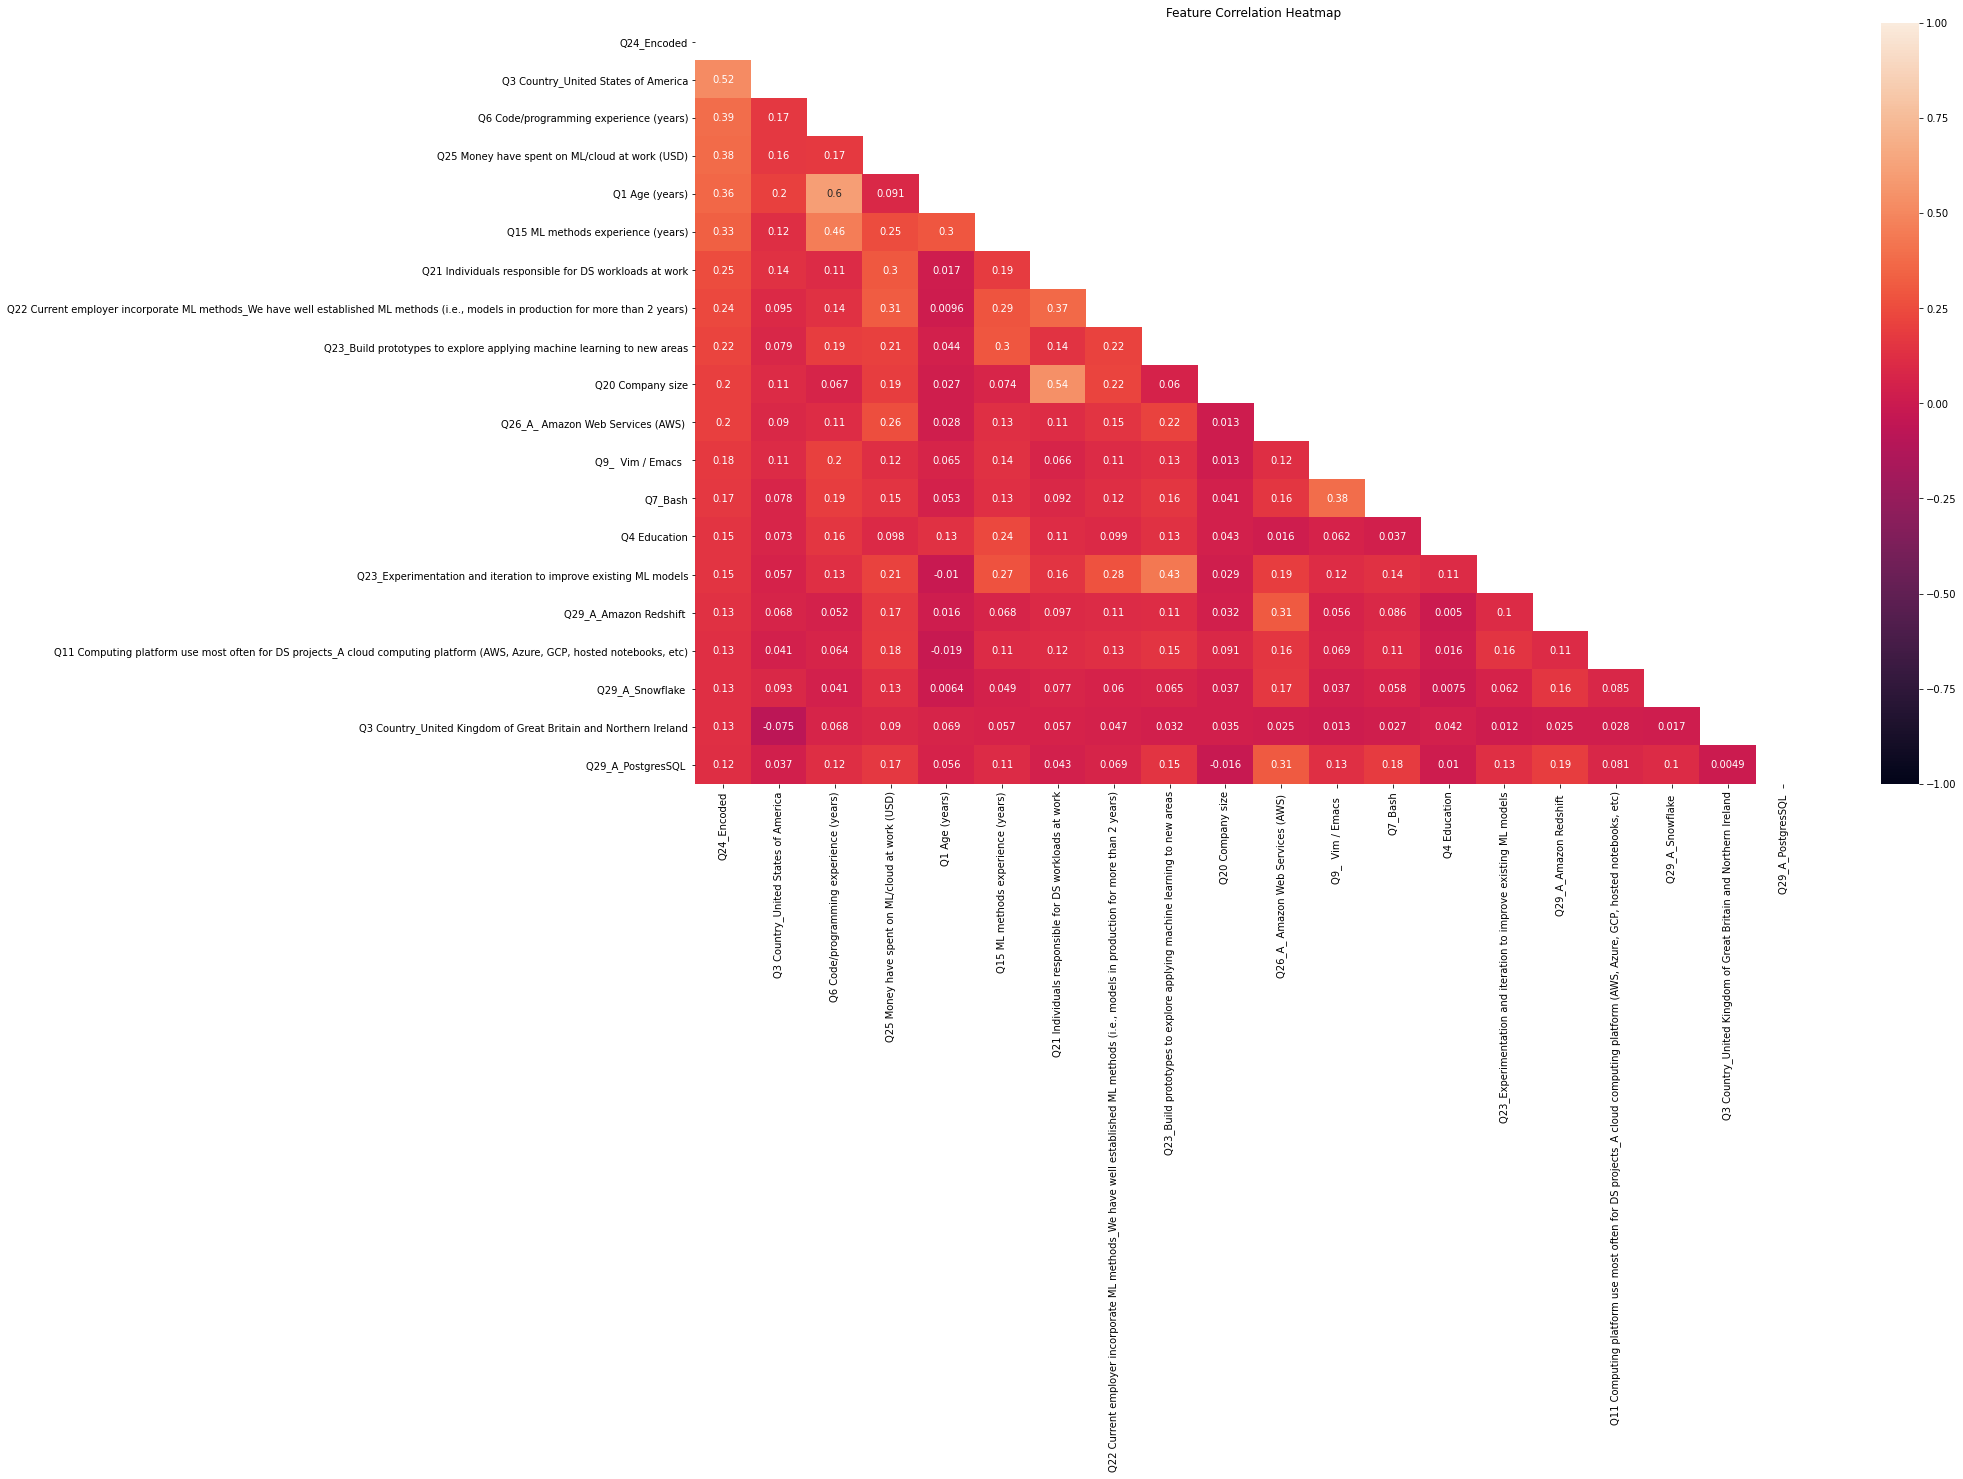

In [35]:
# Correlation matrix
Salaries['Q24_Encoded'] = Salaries['Q24_Encoded'].astype(float)
corr_matrix = Salaries.corr()
 
# Visualizes 20 original attributes most related to a survey respondent’s yearly compensation
corr_matrix.nlargest(20,'Q24_Encoded')
most_related_features = corr_matrix.nlargest(20,'Q24_Encoded')['Q24_Encoded'].index.to_list()
print ("Top 20 related features:", most_related_features)

plt.figure(figsize=(25,14))
# create musk show half matrix
mask = np.triu(np.ones_like(Salaries[most_related_features].corr(), dtype=bool))
heatmap = sns.heatmap(Salaries[most_related_features].corr(), vmin=-1, vmax=1, annot=True, mask=mask)
heatmap.set_title('Feature Correlation Heatmap')
plt.show()

### Ordinal Logistic Regression  

Start with lowest salary bucket, encode '0-9,999' to 0 and rest buckets to 1. Perform binary logistic regression and get the probability of belonging to bucket '0-9,999'. Then encode '0-9,999' and '10,000-19,999' to 0 and rest buckets to 1. Perform binary logistic regression and get the probability of belonging to class 0. Repeat this process 14 times, we would derive 14 models and probability of belonging to each of 15 salaries buckets.


##### Feature Selection: Lasso Regularization

Using ordinal logistic regression with Lasso regularization and let the algorithm to decide which feature to select. This algorithm basically adds a penalty term l1 norm to the original cost function, the features with coefficient 0 will be dropped and others will be selected. Set C = 1 for now. C is the inverse of regularization strength. Smaller C values specify stronger regularization, less features would be selected, and vice versa. The table in the left indicates what features have been selected for models that compute probability of belonging to each of the salary buckets. For example, the model compute probability of belonging to salary bucket '20,000-29,999' select 254 features.  

In [36]:
# Seperate dataset into Features (X) and Target (y)
X = Salaries.drop(columns = ['Q24_buckets','Q24_Encoded'])
y = Salaries['Q24_buckets']

# List contains all salary bucket
Target_class =  ['0-9,999',
                 '10,000-19,999',
                 '20,000-29,999',
                 '30,000-39,999',
                 '40,000-49,999',
                 '50,000-59,999',
                 '60,000-69,999',
                 '70,000-79,999',
                 '80,000-89,999',
                 '90,000-99,999',
                 '100,000-124,999',
                 '125,000-149,999',
                 '150,000-199,999',
                 '200,000-249,999',
                 '>250,000']

# Split data into a training and testing set (7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101, test_size=0.3)

##### Fucntion "designed_lr" outputs:
1. select_features_models: features selected for models that compute probability of belonging to each of the salary buckets <br>
2. prob_class: probability of belonging to each of the salary buckets <br>
3. accuracy: accuracy score of the model <br>
4. predictions: predicted salary bucket

In [37]:
def designed_lr (X_train, X_test, y_train, y_test, hyper_C, hyper_penalty):

    # Create empty list and table
    select_features = []
    prob_class = pd.DataFrame({})
    predictions = []

    for i in np.arange(1,15): #1-14

                # encode target from ordinal to binary Class 0 and 1
                class0 = Target_class[:i]
                y_train_binary = np.where([x in class0 for x in y_train], 0, y_train)
                y_train_binary = np.where(y_train_binary != 0, 1, y_train_binary)
                y_train_binary = y_train_binary.astype(float)

                # Standardize Features 
                scaler = StandardScaler()
                X_train_new = scaler.fit_transform(X_train)
                X_test_new = scaler.transform(X_test)

                # Lasso Regularization: set C = 1
                model = LogisticRegression(C=hyper_C, penalty= hyper_penalty, solver='liblinear',random_state=101)   
                model.fit(X_train_new, y_train_binary)

                # model.coef_: selected if beta != 0 
                select_features_one_model = X.columns.to_numpy()[(model.coef_ != 0).tolist()[0]]
                select_features = select_features + [select_features_one_model.tolist()]

                # Choose first column (probability belong to target bucket class 0)
                prob_one_class = pd.DataFrame((100 * model.predict_proba(X_test_new)).round(2))[0]
                prob_class = pd.concat([prob_class,prob_one_class], axis=1)  


    # select_features_models: selected features for 14 models to compute probability of belonging salary buckets.
    select_features_models = pd.DataFrame(select_features).T
    select_features_models.columns=Target_class[:14]


    # prob_class: probability of belonging to each of the salary buckets.
    prob_class['>250,000'] = np.ones(prob_class.shape[0])*100  # Add columns bucket ">250,000" 
    prob_class.columns = Target_class 
    for i in np.arange(14,0,-1):  # compute pdf
            prob_class.iloc[:,i] = prob_class.iloc[:,i] - prob_class.iloc[:,i-1]   
            prob_class.iloc[:,i] = np.where(prob_class.iloc[:,i] < 0, 0, prob_class.iloc[:,i])


    # accuracy: predict bucket with the largest probability, compare with the target   
    for i in range(len(prob_class)):
            max_prob = prob_class.iloc[i,:].max()
            max_prob_class = prob_class.iloc[i,:] [prob_class.iloc[i,:] == max_prob].index[0]
            predictions.append(max_prob_class)

    predictions = pd.DataFrame(predictions)
    accuracy = accuracy_score(y_test, predictions)

    return select_features_models, prob_class, accuracy, predictions

##### Lasso Regularization with C = 1

In [38]:
select_features_models, prob_class, accuracy, predictions = designed_lr (X_train, X_test, y_train, y_test,
                                                                         hyper_C=1, hyper_penalty = 'l1')

In [39]:
# features selected for models that compute probability of belonging to each of the salary buckets
select_features_models

,"0-9,999","10,000-19,999","20,000-29,999","30,000-39,999","40,000-49,999","50,000-59,999","60,000-69,999","70,000-79,999","80,000-89,999","90,000-99,999","100,000-124,999","125,000-149,999","150,000-199,999","200,000-249,999"
0,Q1 Age (years),Q1 Age (years),Q1 Age (years),Q1 Age (years),Q1 Age (years),Q1 Age (years),Q1 Age (years),Q1 Age (years),Q1 Age (years),Q1 Age (years),Q1 Age (years),Q1 Age (years),Q1 Age (years),Q1 Age (years)
1,Q4 Education,Q4 Education,Q4 Education,Q4 Education,Q4 Education,Q4 Education,Q4 Education,Q4 Education,Q4 Education,Q4 Education,Q4 Education,Q4 Education,Q4 Education,Q4 Education
2,Q6 Code/programming experience (years),Q6 Code/programming experience (years),Q6 Code/programming experience (years),Q6 Code/programming experience (years),Q6 Code/programming experience (years),Q6 Code/programming experience (years),Q6 Code/programming experience (years),Q6 Code/programming experience (years),Q6 Code/programming experience (years),Q6 Code/programming experience (years),Q6 Code/programming experience (years),Q6 Code/programming experience (years),Q6 Code/programming experience (years),Q6 Code/programming experience (years)
3,Q7_Python,Q7_Python,Q7_Python,Q7_Python,Q7_Python,Q7_Python,Q7_Python,Q7_Python,Q7_Python,Q7_Python,Q7_Python,Q7_Python,Q7_Python,Q7_Python
4,Q7_R,Q7_R,Q7_R,Q7_R,Q7_R,Q7_R,Q7_R,Q7_R,Q7_R,Q7_R,Q7_R,Q7_R,Q7_R,Q7_R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,"Q38 primary tool use at work/school to analyze data_Advanced statistical software (SPSS, SAS, etc.)",None,"Q38 primary tool use at work/school to analyze data_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q38 primary tool use at work/school to analyze data_Advanced statistical software (SPSS, SAS, etc.)","Q38 primary tool use at work/school to analyze data_Advanced statistical software (SPSS, SAS, etc.)","Q38 primary tool use at work/school to analyze data_Local development environments (RStudio, JupyterLab, etc.)",None,None,"Q38 primary tool use at work/school to analyze data_Local development environments (RStudio, JupyterLab, etc.)","Q38 primary tool use at work/school to analyze data_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",None,None,None,None
253,"Q38 primary tool use at work/school to analyze data_Basic statistical software (Microsoft Excel, Google Sheets, etc.)",None,"Q38 primary tool use at work/school to analyze data_Local development environments (RStudio, JupyterLab, etc.)","Q38 primary tool use at work/school to analyze data_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q38 primary tool use at work/school to analyze data_Basic statistical software (Microsoft Excel, Google Sheets, etc.)",None,None,None,None,"Q38 primary tool use at work/school to analyze data_Local development environments (RStudio, JupyterLab, etc.)",None,None,None,None
254,"Q38 primary tool use at work/school to analyze data_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)",None,None,"Q38 primary tool use at work/school to analyze data_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q38 primary tool use at work/school to analyze data_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)",None,None,None,None,None,None,None,None,None
255,"Q38 primary tool use at work/school to analyze data_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",None,None,"Q38 primary tool use at work/school to analyze data_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q38 primary tool use at work/school to analyze data_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)",None,None,None,None,None,None,None,None,None


In [40]:
# probability of belonging to each of the salary buckets.
prob_class

,"0-9,999","10,000-19,999","20,000-29,999","30,000-39,999","40,000-49,999","50,000-59,999","60,000-69,999","70,000-79,999","80,000-89,999","90,000-99,999","100,000-124,999","125,000-149,999","150,000-199,999","200,000-249,999",">250,000"
0,3.48,0.80,0.00,1.71,1.06,0.84,4.83,0.00,3.51,15.61,10.95,0.0,49.87,2.84,6.14
1,72.90,12.08,7.75,2.94,0.95,0.00,0.00,1.99,1.28,0.00,1.28,0.0,0.00,1.43,2.31
2,2.81,0.00,1.09,0.00,4.61,0.35,0.29,3.26,1.61,0.27,13.20,0.0,27.97,26.94,19.17
3,8.92,0.00,6.38,9.36,19.83,13.11,28.19,9.21,0.00,0.04,4.07,0.0,0.00,0.00,7.52
4,1.30,2.40,1.26,5.50,14.37,6.78,24.88,24.05,9.96,5.00,3.02,0.0,0.00,0.00,2.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,77.22,17.23,0.00,0.83,2.03,3.08,1.01,0.54,1.50,0.00,0.18,0.0,0.00,0.15,0.39
3047,21.39,25.57,24.02,0.62,0.00,0.00,7.32,0.64,4.71,4.12,12.16,0.0,1.18,0.00,28.07
3048,45.00,25.17,14.68,5.44,2.81,3.40,2.04,0.67,0.00,0.06,0.40,0.0,0.09,0.00,0.37
3049,62.99,22.05,4.45,7.09,1.11,1.15,0.68,0.00,0.48,0.00,0.03,0.0,0.98,0.02,0.03


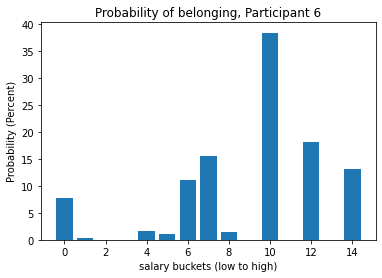

Predict sSalaries: 100,000-124,999
Actual Salaries: 125,000-149,9991


In [41]:
# visualize probability of belonging to one participant

def prob_histogram (obs):
    bucket = np.arange(15) # 15 bucket
    p = prob_class.iloc[obs,:].tolist()
    plt.title ('Probability of belonging, Participant '+ str(obs))
    plt.xlabel('salary buckets (low to high)')
    plt.ylabel('Probability (Percent)')
    plt.bar(bucket, p)
    plt.show()
    
    print ("Predict sSalaries:", predictions.iloc[obs,:].tolist()[0])
    print ("Actual Salaries:", y_test.iloc[obs])

prob_histogram (6)
  

In [42]:
# predictive accuracy 
accuracy 

0.421501147164864

## 2.3 Model implementation
Implement ordinal logistic regression algorithm on the training data using 10-fold crossvalidation.
Consider following questions:
* How does your model accuracy compare across the folds? 
* What is average and variance of accuracy for folds?
* Treating each value of hyperparameter(s) as a new model, choose model with best performence based on bias-variance trade-off 

Apply scaling/normalization of features, if necessary.

### 10-fold Cross Validation
Models accuracies vary across folds since the training data (9 folds) and the validation data (1 fold) are different in each iteration. When C=1, the model has a cross validation score of 41.25% with a standard deviation of 1.23%. CV score computes average accuracy over 10 folds, it gives better estimation of the testing error and it didn't miss any information of data. 
##### Standardize Features
features with greater scales would tend to have larger coefficient and more important, standardize features before modeling could avoid this issue.

##### Function "CV_mean_accuracy" return mean & std of accuracy for 10 folds

In [43]:
def CV_accuracy (C, penalty):

    Salary_X_train, Salary_X_test, Salary_y_train, Salary_y_test = train_test_split(X, y, random_state=101, test_size=0.3)

    X_validation = Salary_X_train
    Y_validation = Salary_y_train

    # set foldes = 10
    kfold = KFold(n_splits=10)  
    outcomes = []
    fold = 0
    
    for train_index, test_index in kfold.split(X_validation):
        fold += 1

        X_train, X_test = X_validation.values[train_index], X_validation.values[test_index]
        y_train, y_test = Y_validation.values[train_index], Y_validation.values[test_index]

        # use function "designed_lr" designed in part 2
        select_features_models, prob_class, accuracy, predictions = designed_lr (X_train, X_test, y_train, y_test,
                                                                    hyper_C=C, hyper_penalty = penalty)
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))    
         
    mean_outcome = np.mean(outcomes)
    std_outcome=np.std(outcomes)
    print("Mean r2: {0}".format(mean_outcome)) 
    print("Standard Deviation: {0}".format(std_outcome)) 

    return mean_outcome, std_outcome

In [44]:
CV_accuracy (1,'l1')

Fold 1 accuracy: 0.3806179775280899
Fold 2 accuracy: 0.42275280898876405
Fold 3 accuracy: 0.4157303370786517
Fold 4 accuracy: 0.42275280898876405
Fold 5 accuracy: 0.41151685393258425
Fold 6 accuracy: 0.39747191011235955
Fold 7 accuracy: 0.4241573033707865
Fold 8 accuracy: 0.42334739803094235
Fold 9 accuracy: 0.42616033755274263
Fold 10 accuracy: 0.4149085794655415
Mean r2: 0.41394163150492264
Standard Deviation: 0.013744564415721642


(0.41394163150492264, 0.013744564415721642)

## 2.4 Model tuning

Improve the performance of the models from the previous step with
hyperparameter tuning and select a final optimal model using grid search based on a metric (or
metrics) that you choose. Choosing an optimal model for a given task (comparing multiple
classifiers on a specific domain) requires selecting performance measures, for example accuracy,
precision, recall and/or F1-score to compare the model performance. Justify the metric you
selected.  

### Hyperparameters tuning: penalty & C
Hyperparameter including penalty (norm), C (inverse of regularization strength), scoring (metric to evaluate performance), cv (number of folds), test_size (proportion of test data), etc. <br>

Complex model with too many features would have high variance, and also computational expensive. Simple model with too less features would have both high bias and variance. The model has adequate amount of bias and variance, is the one has highest testing accuracy. Set cv = 10 and test_size = 0.3. Turn hyperparameter penalty and C and use grid search to find optimal model with the highest CV score. (CV better estimate the testing error)   

##### Optimal model (C = 0.05, penalty = 'l1') 
CV = 43.0%, Testing accuracy = 43.13%
##### Previous model (C = 1, penalty = 'l1')  
CV = 41.25%, Testing accuracy = 42.31%

In [45]:
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.05,0.1,0.5,1,5,10,100]:
    for penalty in ['l1','l2']:
        
        # Recall: CV_accuracy produce mean & std of accuracy for 10 folds
        print ("\n")
        print ("Model uses C = %f, penalty = %s" % (C,penalty))
        mean_accuracy, std_accuracy = CV_accuracy (C,penalty)
       
        if mean_accuracy > best_accuracy:
            best_params = {'C':C, 'penalty':penalty}
            best_accuracy = mean_accuracy
            best_std = std_accuracy

print ("\n")
print (best_params)
print ("Best Score: {}({})".format(round(best_accuracy,3),round(best_std,3)))      
print ("\nThe optimal log model uses C={}, and {} penalty, and has a cross validation score of {} with a standard deviation of {}".format(best_params['C'],best_params['penalty'],round(best_accuracy,3),round(best_std,3)))



Model uses C = 0.001000, penalty = l1
Fold 1 accuracy: 0.375
Fold 2 accuracy: 0.41853932584269665
Fold 3 accuracy: 0.40730337078651685
Fold 4 accuracy: 0.4044943820224719
Fold 5 accuracy: 0.3848314606741573
Fold 6 accuracy: 0.38342696629213485
Fold 7 accuracy: 0.4058988764044944
Fold 8 accuracy: 0.42334739803094235
Fold 9 accuracy: 0.4120956399437412
Fold 10 accuracy: 0.42334739803094235
Mean r2: 0.4038284818028098
Standard Deviation: 0.016345414763299187


Model uses C = 0.001000, penalty = l2
Fold 1 accuracy: 0.36797752808988765
Fold 2 accuracy: 0.4101123595505618
Fold 3 accuracy: 0.40168539325842695
Fold 4 accuracy: 0.3960674157303371
Fold 5 accuracy: 0.375
Fold 6 accuracy: 0.37780898876404495
Fold 7 accuracy: 0.39325842696629215
Fold 8 accuracy: 0.4078762306610408
Fold 9 accuracy: 0.3980309423347398
Fold 10 accuracy: 0.39943741209563993
Mean r2: 0.39272546974509714
Standard Deviation: 0.013586518602646598


Model uses C = 0.010000, penalty = l1
Fold 1 accuracy: 0.4044943820224719

In [46]:
# 10 fold cross validation
CV_accuracy (0.05,'l1')

Fold 1 accuracy: 0.4101123595505618
Fold 2 accuracy: 0.4452247191011236
Fold 3 accuracy: 0.4311797752808989
Fold 4 accuracy: 0.43258426966292135
Fold 5 accuracy: 0.4157303370786517
Fold 6 accuracy: 0.40308988764044945
Fold 7 accuracy: 0.4353932584269663
Fold 8 accuracy: 0.43741209563994377
Fold 9 accuracy: 0.4430379746835443
Fold 10 accuracy: 0.4360056258790436
Mean r2: 0.42897703029441053
Standard Deviation: 0.013574889004882724


(0.42897703029441053, 0.013574889004882724)

In [47]:
select_features_models, prob_class, accuracy, predictions = designed_lr (X_train, X_test, y_train, y_test,
                                                                         hyper_C=0.05, hyper_penalty = 'l1')
accuracy

0.4277286135693215

## 2.5 Testing & Discussion
##### Use optimal model to make classifications on the test set. Plot the distribution of true target variable values and their predictions on both the training set and test set.  

Testing accuracy = 42.77 %


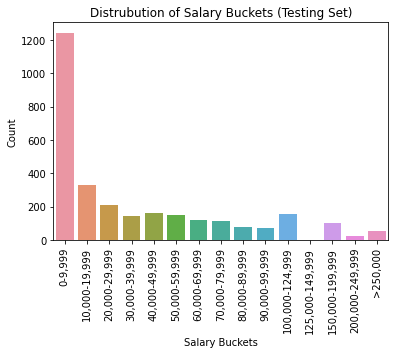

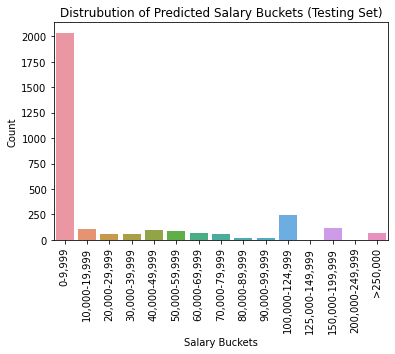

In [49]:
# Testing set accuracy
select_features_models, prob_class, accuracy, predictions = designed_lr (X_train, X_test, y_train, y_test,
                                                                         hyper_C=0.05, hyper_penalty = 'l1')
print("Testing accuracy =", (round(100 * accuracy,2)),'%')

# Plot distrubution ot true and predicted target on testing set
sns.countplot(x='Q24_buckets',data=pd.DataFrame(y_test),order=Target_class)
plt.title('Distrubution of Salary Buckets (Testing Set)')
plt.xlabel('Salary Buckets')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

predictions = predictions.rename(columns = {0 : 'Target'})
sns.countplot(x='Target',data=predictions, order=Target_class)
plt.title('Distrubution of Predicted Salary Buckets (Testing Set)')
plt.xlabel('Salary Buckets')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Traning accuracy = 47.28 %


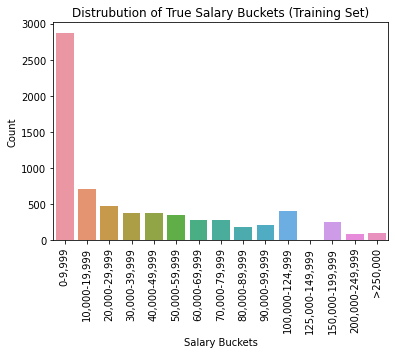

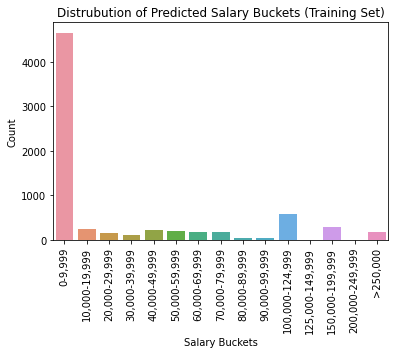

In [50]:
# Training set accuracy
select_features_models, prob_class, accuracy, predictions = designed_lr (X_train, X_train, y_train, y_train,
                                                                         hyper_C=0.05, hyper_penalty = 'l1')
print("Traning accuracy =", (round(100 * accuracy,2)),'%')

# Plot distrubution ot true and predicted target on training set
sns.countplot(x='Q24_buckets',data=pd.DataFrame(y_train), order=Target_class)
plt.title('Distrubution of True Salary Buckets (Training Set)')
plt.xlabel('Salary Buckets')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

predictions = predictions.rename(columns = {0 : 'Target'})
sns.countplot(x='Target',data=predictions, order=Target_class)
plt.title('Distrubution of Predicted Salary Buckets (Training Set)')
plt.xlabel('Salary Buckets')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

##### Consider following questions:
* How does the model perform on the test set vs. the training set? 
* The overall fit of the model, how to increase the accuracy (test, training)? 
* Is it overfitting or underfitting? Why? Plot the distribution of true target variable values and their predictions on both the training set and test set. 

Training accuracy is 47.53% and Testing accuracy is 43.13%, which imply the model is overfitting a bit. Overfitted model has lower bias but higher variance, higher training accuracy and lower testing accuracy. Model could be improved by decreasing hyperparameter C, the variance and testing error will decrease then. Try C = 0.045, the testing accuracy increased to 43.33%.

In [51]:
select_features_models, prob_class, accuracy, predictions = designed_lr (X_train, X_test, y_train, y_test,
                                                                         hyper_C=0.045, hyper_penalty = 'l1')
print("Testing accuracy =", (round(100 * accuracy,2)),'%')

select_features_models, prob_class, accuracy, predictions = designed_lr (X_train, X_train, y_train, y_train,
                                                                         hyper_C=0.045, hyper_penalty = 'l1')
print("Traning accuracy =", (round(100 * accuracy,2)),'%')

Testing accuracy = 43.13 %
Traning accuracy = 47.18 %


#####  Insight gained from the dataset and trained classification model:

The frequency of predicted salary buckets '0-9,999' and '100,000-124,999' is much larger than the true value. The observations close to those two buckets are more likely to be classified in them. The reason is overfitted model would classify close data together to increase higher variance, but it would decrease accuracy.

### Validation Curve
Validation Curve visualize how hyperparameter C effect the training and CV score. Add a norm term to model can reduce overfitting. Smaller hyperparameter C specify stronger regularization strength, it can decrease model complexity and variance. Finally, we can achieve better predictive accuracy, although the bias will increase a bit. <br>
 
From the validation curve, model with C=1 and penalty = 'l1' is optimal. 
 

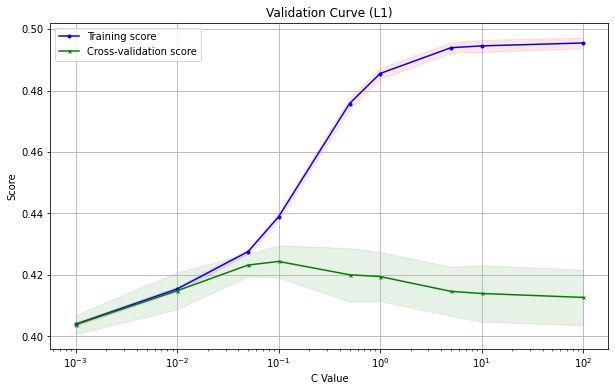

In [52]:
# This hyperparameter C tuning can be visualized by a validation curve (test set vs validation set)
C_list = [0.001,0.01,0.05,0.1,0.5,1,5,10,100]
model = LogisticRegression(penalty= 'l1', solver='liblinear',random_state=101)   
train_scores, test_scores = validation_curve(estimator=model, X=X, y=y, param_name='C', param_range=C_list, cv=10)

plt.figure(figsize=(10,6))
plt.title('Validation Curve (L1)')
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.grid()
plt.fill_between(C_list, train_mean - train_std,\
                 train_mean + train_std, alpha=0.1, \
                 color="r")
plt.fill_between(C_list, test_mean - test_std,\
                 test_mean + test_std, alpha=0.1, color='g')

plt.plot(C_list, train_mean, color='blue', marker='o', markersize=3, label='Training score')
plt.plot(C_list, test_mean, color='green', marker='x', markersize=3, label='Cross-validation score') 
plt.xscale('log')
plt.xlabel('C Value')
plt.ylabel('Score')
plt.legend(loc='upper left')
plt.show()

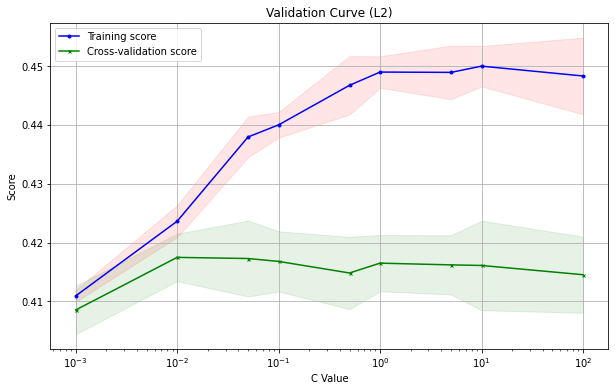

In [53]:
# This hyperparameter C tuning can be visualized by a validation curve (test set vs validation set)
C_list = [0.001,0.01,0.05,0.1,0.5,1,5,10,100]
model = LogisticRegression(penalty= 'l2', solver='liblinear',random_state=101)   
train_scores, test_scores = validation_curve(estimator=model, X=X, y=y, param_name='C', param_range=C_list, cv=10)

plt.figure(figsize=(10,6))
plt.title('Validation Curve (L2)')
train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

plt.grid()
plt.fill_between(C_list, train_mean - train_std,\
                 train_mean + train_std, alpha=0.1, \
                 color="r")
plt.fill_between(C_list, test_mean - test_std,\
                 test_mean + test_std, alpha=0.1, color='g')

plt.plot(C_list, train_mean, color='blue', marker='o', markersize=3, label='Training score')
plt.plot(C_list, test_mean, color='green', marker='x', markersize=3, label='Cross-validation score') 
plt.xscale('log')
plt.xlabel('C Value')
plt.ylabel('Score')
plt.legend(loc='upper left')
plt.show()

### Learning Curve

Learning Curve visualize the training and CV score for different training set size. Training score and CV score need to be close enough, otherwise the model would be overfitting and have higher testing error. And both scores have to be large enough to ensure predictive accuracy. C = 0.05 gives better result. 

In [54]:
def plot_learning_curve(X, y, hyper_C, hyper_penalty, ylim=None, scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
#     plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    # define model for learning_curve
    model = LogisticRegression(C=hyper_C, penalty= hyper_penalty, solver='liblinear', random_state=101)   
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10, scoring=scoring, 
                                                            n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    # plot score range
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot Training and CV score
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title("Learning Curve (Ordinal lr) " + hyper_penalty + ", C=" + str(hyper_C))
    plt.legend(loc="best")
    plt.show()
    
    return plt

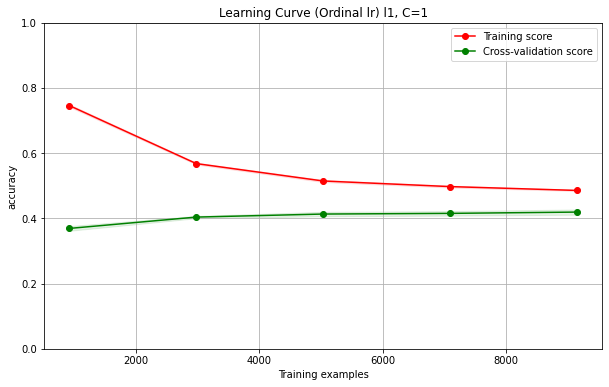

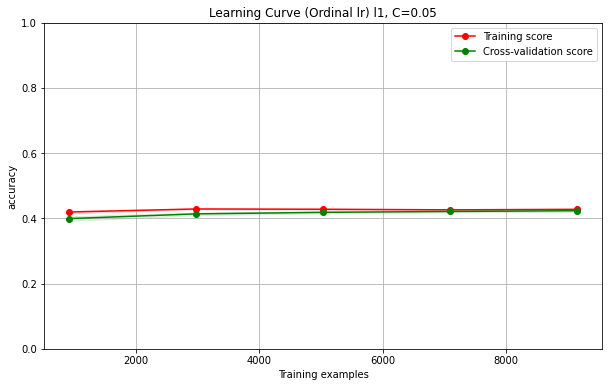

<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [55]:
plot_learning_curve(X, y, hyper_C=1, hyper_penalty = 'l1', ylim=[0,1])
plot_learning_curve(X, y, hyper_C=0.05, hyper_penalty = 'l1', ylim=[0,1])